In [32]:
#| code-summary: "Load Packages"
#| code-fold: true

# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import plotly.express as px

# statistics
import statsmodels.api as sm

In [33]:
#| echo: false

from IPython.display import display, HTML
HTML('<style>.output {flex-direction: row;}</style>')

In [34]:
#| code-summary: "Options"
#| code-fold: true

# pandas options
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7

# Numpy options
np.set_printoptions(precision = 2, suppress=True)

**Numpy & pandas**

Python 언어는 수치 계산을 위해 디자인되지 않았기 때문에, 데이터 분석에 대한 효율적이고 빠른 계산이 요구되면서 C/C++이라는 언어로 구현된 NumPy (Numerical Python)가 탄생하였고, Python 생태계 안에 통합되었음. 기본적으로 Python 언어 안에 새로운 언어라고 볼 수 있음. 데이터 사이언스에서의 대부분의 계산은 NumPy의 ndarray (n-dimensioal array)와 수학적 operator들을 통해 계산됨. 

데이터 사이언스가 발전함에 따라 단일한 floating-point number들을 성분으로하는 array들의 계산에서 벗어나 columns별로 다른 데이터 타입(string, integer, object..)을 포함하는 tabular형태의 데이터를 효율적으로 처리해야 할 필요성이 나타났고, 이를 다룰 수 있는 새로운 언어를 NumPy 위에 개발한 것이 pandas임. 이는 기본적으로 Wes Mckinney에 의해 독자적으로 개발이 시작되었으며, 디자인적으로 불만족스러운 점이 지적되고는 있으나 데이터 사이언스의 기본적인 언어가 되었음.

NumPy와 pandas에 대한 자세한 내용은 Python for Data Analysis by Wes MacKinney 참고  
특히, NumPy는 Ch.4 & appendices

## NumPy
- 수학적 symbolic 연산에 대한 구현이라고 볼 수 있으며,
  
- 행렬(matrix) 또는 벡터(vector)를 **ndarray** (n-dimensional array)이라는 이름으로 구현함.
  - 사실상 정수(`int`)나 실수(`float`)의 한가지 타입으로 이루어짐.  
  - 고차원의 arrays 가능
  
    ![](images/numpy_arrays.png){width=400}
    
    Source: [Medium.com](https://medium.com/hackernoon/10-machine-learning-data-science-and-deep-learning-courses-for-programmers-7edc56078cde)
    
    <br>

- 가령, 다음과 같은 matrix 연산이 있다면,
  
  $\begin{bmatrix}1 & 2 \\ 3 & 4 \\ 5 & 6 \end{bmatrix} \begin{bmatrix}2 \\ -1 \end{bmatrix} = \begin{bmatrix}0 \\ 2 \\ 4 \end{bmatrix}$

In [35]:
import numpy as np  # import numpy package

A = np.array([[1, 2],
              [3, 4],
              [5, 6]]) # 3x2 matrix
X = np.array([[2],
              [-1]]) # 2x1 matrix

In [36]:
A @ X  # A * X : matrix multiplication

array([[0],
       [2],
       [4]])

In [37]:
A.dot(X) # same as A @ X

array([[0],
       [2],
       [4]])

Vector vs. Matrix

In [38]:
arr1 = np.array([0, 2, 4]) # 1-dim matrix: vector
arr2 = np.array([[0, 2, 4]]) # 2-dim 1x3 matrix
arr3 = np.array([[0],
                 [2],
                 [4]]) # 2-dim 3x1 matrix

print(arr1); print(arr2); print(arr3)

[0 2 4]
[[0 2 4]]
[[0]
 [2]
 [4]]


In [39]:
print(arr1.shape); print(arr2.shape); print(arr3.shape)

(3,)
(1, 3)
(3, 1)


In [40]:
A + A # element-wise addition

array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

In [41]:
2 * A - 1 # recycling rule

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [42]:
np.exp(A) # element-wise

array([[  2.72,   7.39],
       [ 20.09,  54.6 ],
       [148.41, 403.43]])

In [43]:
np.add(A, A)

array([[ 2,  4],
       [ 6,  8],
       [10, 12]])

In [44]:
np.power(A, 2)

array([[ 1,  4],
       [ 9, 16],
       [25, 36]])

![](images/unary.png){width=700}

![](images/binary.png){width=700}  
Source: *Python for Data Analysis (3e) by Wes MacKinney*

### Python vs. NumPy

In [89]:
2**31

2147483648

In [91]:
np.array([2**31]) # dtype='int64'

array([2147483648])

NumPy의 data type

In [81]:
a = np.array([2**31-1], dtype='int32')
a + 1

array([-2147483648], dtype=int32)

![](images/data_types.png){width=700}  
Source: *Python for Data Analysis (3e) by Wes MacKinney*

<br>

## pandas
**Series & DataFrame**

### Series
- 1개의 column으로 이루어진 data format  
- NumPy array에 labels을 붙인 것으로 볼 수 있음: *index*  
- DataFrame의 각 칼럼들을 Series로 이해할 수 있음

![](images/pandas_series.png){width=600} \
Source: [Practical data science](https://www.practicaldatascience.org/html/index.html)

### DataFrame

In [74]:
#| echo: false
tips = sns.load_dataset("tips")
print(tips.head(5))
print("...")
print("244 rows × 7 columns")

   total_bill  tip     sex smoker  day    time  size
0       16.99 1.01  Female     No  Sun  Dinner     2
1       10.34 1.66    Male     No  Sun  Dinner     3
2       21.01 3.50    Male     No  Sun  Dinner     3
3       23.68 3.31    Male     No  Sun  Dinner     2
4       24.59 3.61  Female     No  Sun  Dinner     4
...
244 rows × 7 columns


각 column들이 **한 가지 data type**으로 이루어진 tabular형태 (2d)의 data format

- 각 column은 기본적으로 한 가지 data type인 것이 이상적이나, 다른 타입이 섞여 있을 수 있음
- NumPy의 2-dim array의 각 column에 labels을 부여한 것으로 볼 수도 있으나, 여러 다른 기능들이 추가됨
- NumPy의 경우 고차원의 array를 다룰 수 있음: ndarray
  - 고차원의 DataFrame과 비슷한 것은 xarray가 존재
- Labels와 index를 제외한 데이터 값은 거의 NumPy ndarray로 볼 수 있음  
  (pandas.array 존재)

![](images/pandas_dataframe.png){width=500} \
Source: [Practical data science](https://www.practicaldatascience.org/html/index.html) 

___

#### NumPy array <> pandas DataFrame

In [92]:
#| layout-ncol: 5
import pandas as pd  # import pandas package

In [94]:
A = np.array([[1, 2],
              [3, 4],
              [5, 6]]) # 3x2 matrix
A

array([[1, 2],
       [3, 4],
       [5, 6]])

In [95]:
#| layout-ncol: 5
df = pd.DataFrame(A, columns=["A1", "A2"]) # A1, A2: column labels
df

,A1,A2
0,1,2
1,3,4
2,5,6


In [96]:
#| layout-ncol: 5
df2 = pd.DataFrame(A, 
                   columns=["A1", "A2"], # A1, A2: column labels
                   index=["red", "blue", "green"]) # index labels
df2

,A1,A2
red,1,2
blue,3,4
green,5,6


In [97]:
# 데이터 값들은 NumPy array
df2.values

array([[1, 2],
       [3, 4],
       [5, 6]])

In [98]:
type(df2)

pandas.core.frame.DataFrame

#### Columns
Series로 추출

In [99]:
s = df2["A1"] # select a column A1
s
# DataFrame의 column label이 Series의 name으로 전환

red      1
blue     3
green    5
Name: A1, dtype: int64

In [100]:
type(s)

pandas.core.series.Series

___ 
<br />

### Index objects {#sec-pandas-index}

In [52]:
#| layout-ncol: 4
frame = pd.DataFrame(np.arange(6).reshape((2, 3)),
                     index=pd.Index(["Ohio", "Colorado"], name="state"),
                     columns=pd.Index(["one", "two", "three"], name="number"))
frame

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


In [53]:
frame.index

Index(['Ohio', 'Colorado'], dtype='object', name='state')

In [54]:
frame.columns # columns도 index object

Index(['one', 'two', 'three'], dtype='object', name='number')

::: {.callout-note}
"number": columns의 이름
"state": index의 이름

`frame.columns.name`
#> 'number'  
`frame.index.name`
#> 'state'
:::

#### Multi-Index ojbect
Index는 여러 levels을 지닐 수 있음

In [102]:
#| layout-ncol: 4
print(frame)

number    one  two  three
state                    
Ohio        0    1      2
Colorado    3    4      5


In [55]:
frame.stack() # stack()은 long form으로 변환
# 2 levels의 index를 가진 Series

state     number
Ohio      one       0
          two       1
          three     2
Colorado  one       3
          two       4
          three     5
dtype: int64

In [103]:
#| layout-ncol: 3
# MultiIndex를 직접 구성
df = pd.DataFrame(np.arange(12).reshape((4, 3)),
        index=pd.MultiIndex.from_arrays([["a", "a", "b", "b"], [1, 2, 1, 2]], names=["idx1", "idx2"]),
        columns=pd.MultiIndex.from_arrays([["Ohio", "Ohio", "Colorado"], ["Green", "Red", "Green"]], names=["state", "color"]))

In [104]:
#| echo: false
print(df)

state      Ohio     Colorado
color     Green Red    Green
idx1 idx2                   
a    1        0   1        2
     2        3   4        5
b    1        6   7        8
     2        9  10       11


#### Time Series
Index는 times series에 특화

In [106]:
fb = pd.read_csv('data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903
2018-01-03,181.88,184.78,181.33,184.67,16886563
2018-01-04,184.90,186.21,184.10,184.33,13880896
2018-01-05,185.59,186.90,184.93,186.85,13574535
2018-01-08,187.20,188.90,186.33,188.28,17994726


Plot method을 이용해 간단히 trendline을 구할 수 있음

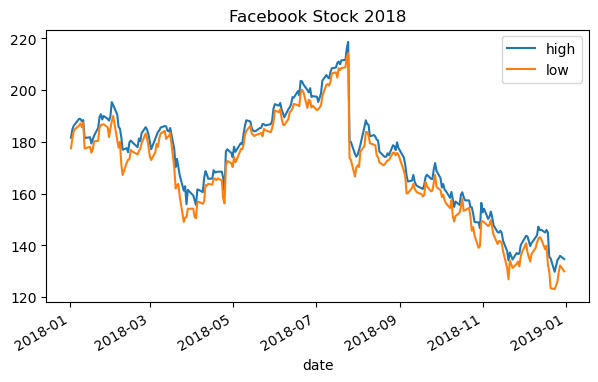

In [58]:
fb.plot(kind='line', y=['high', 'low'], figsize=(7, 4), title='Facebook Stock 2018')
plt.show()

index없이 분석 가능?  
Index를 column으로 전환시켜 index에 신경쓰지 않고 분석할 수도 있음

index의 활용은 강의 후반부에...

In [59]:
fb.reset_index() # index into a column

,date,open,high,low,close,volume
0,2018-01-02,177.68,181.58,177.55,181.42,18151903
1,2018-01-03,181.88,184.78,181.33,184.67,16886563
2,2018-01-04,184.90,186.21,184.10,184.33,13880896
...,...,...,...,...,...,...
248,2018-12-27,132.44,134.99,129.67,134.52,31202509
249,2018-12-28,135.34,135.92,132.20,133.20,22627569
250,2018-12-31,134.45,134.64,129.95,131.09,24625308


___
<br />

###  DataFrame의 연산

NumPy의 ndarray들이 연산되는 방식과 동일하게 series나 DataFrame들의 연산 가능함

In [60]:
#| layout-ncol: 5
df + 2 * df

,A1,A2
0,3,6
1,9,12
2,15,18


In [61]:
#| layout-ncol: 5
np.log(df)

,A1,A2
0,0.00,0.69
1,1.10,1.39
2,1.61,1.79


사실, 연산은 index를 align해서 시행됨

In [62]:
#| echo: false
#| layout-ncol: 3
#| tbl-cap: 
#|  - "frame1"
#|  - "frame2"
frame1 = pd.DataFrame(np.arange(6).reshape((2, 3)),
                     index=pd.Index(["Ohio", "Colorado"], name="state"),
                     columns=pd.Index(["one", "two", "three"], name="number"))
frame2 = pd.DataFrame(np.arange(6).reshape((2, 3)) * 2,
                     index=pd.Index(["Ohio", "Floria"], name="state"),
                     columns=pd.Index(["one", "two", "three"], name="number"))
display(frame1)
display(frame2)

number,one,two,three
state,,,
Ohio,0,1,2
Colorado,3,4,5


number,one,two,three
state,,,
Ohio,0,2,4
Floria,6,8,10


In [63]:
#| layout-ncol: 3
frame1 + frame2

number,one,two,three
state,,,
Colorado,NaN,NaN,NaN
Floria,NaN,NaN,NaN
Ohio,0.00,3.00,6.00


___

(참고) Mixed Data Type

In [64]:
s = pd.Series([1, 2, "3"])

In [65]:
s.dtype # object dtype

dtype('O')

In [66]:
s + s  # "3" + "3" (string): concaternated

0     2
1     4
2    33
dtype: object

In [67]:
s_int = s.astype("int") # astype: type conversion
s_int + s_int

0    2
1    4
2    6
dtype: int64

In [107]:
s2 = pd.Series([1, 2, 3.6]) # automatic type conversion to floating numbers
s2.dtype

dtype('float64')

In [108]:
s2.astype("int") # force type conversion >> floor

0    1
1    2
2    3
dtype: int64